<a href="https://colab.research.google.com/github/hongdaestreet/Data-Analysis-Basic-/blob/main/9_2_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%B9%B4%EB%93%9C%EC%86%8C%EB%B9%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/PNU/3-2/데이터분석입문(겨울)/09_카드소비패턴.csv', encoding='cp949')
df.head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,NaN,가정생활/서비스,20210216,1.117050e+12,65390,10


In [ ]:
df_og = df.copy()
df_og.columns = ['가맹점주소광역시도', '가맹점주소시군구', '업종대분류', '기준일자', '고객주소집계구별', '카드이용금액계','카드이용건수계']

In [ ]:
# 열명 변경
df.columns = ['시도', '시군구', '업종', '기준일자', '고객주소집계구별','금액계', '이용건수계']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    int64  
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# 결측치 확인을 위한 복사 1
df1 = df.copy(deep=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도        500 non-null    object 
 1   시군구       442 non-null    object 
 2   업종        500 non-null    object 
 3   기준일자      500 non-null    int64  
 4   고객주소집계구별  500 non-null    float64
 5   금액계       500 non-null    int64  
 6   이용건수계     500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# 결측치 개수(열)
df1.isnull().sum()

시도           0
시군구         58
업종           0
기준일자         0
고객주소집계구별     0
금액계          0
이용건수계        0
dtype: int64

In [ ]:
# 결측치 확인(행)
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

In [ ]:
# 결측치가 있는 행인덱스 추출
dfs = df1.isnull().sum(axis=1)
nanlt = list(dfs[dfs >= 1].index)
len(nanlt)

58

In [ ]:
# 결측치가 있는 행인덱스 확인
df1[df1.index.isin(nanlt)]

,시도,시군구,업종,기준일자,고객주소집계구별,금액계,이용건수계
4,서울,NaN,가정생활/서비스,20210216,1.117050e+12,65390,10
17,강원,NaN,여행/교통,20180602,1.112060e+12,627437,5
25,서울,NaN,유통,20180613,1.114070e+12,179571,5
26,서울,NaN,유통,20190321,1.120060e+12,28671,40
31,서울,NaN,요식/유흥,20210414,1.108060e+12,22635,5
35,서울,NaN,요식/유흥,20180420,1.119060e+12,22132,20
45,서울,NaN,전자상거래,20170222,1.117050e+12,34657,5
54,서울,NaN,의료,20200508,1.125070e+12,80480,10
55,서울,NaN,의료,20160223,1.105060e+12,166191,5
66,서울,NaN,전자상거래,20190605,1.111070e+12,176050,5


In [ ]:
df1 = df_og.copy(deep=True)
df2 = df_og.copy(deep=True)
df3 = df_og.copy(deep=True)

In [ ]:
# 결측치가 있는 행 제거
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가맹점주소광역시도  442 non-null    object 
 1   가맹점주소시군구   442 non-null    object 
 2   업종대분류      442 non-null    object 
 3   기준일자       442 non-null    int64  
 4   고객주소집계구별   442 non-null    float64
 5   카드이용금액계    442 non-null    int64  
 6   카드이용건수계    442 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.6+ KB


In [ ]:
# 결측치가 있는 열 제거
df2 = df2.dropna(axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가맹점주소광역시도  500 non-null    object 
 1   업종대분류      500 non-null    object 
 2   기준일자       500 non-null    int64  
 3   고객주소집계구별   500 non-null    float64
 4   카드이용금액계    500 non-null    int64  
 5   카드이용건수계    500 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


In [ ]:
# 특정값으로 채우기
df3=df3.fillna('-')
df3.head()

,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,-,가정생활/서비스,20210216,1.117050e+12,65390,10


In [ ]:
df3 = df_og.copy()

In [ ]:
# 앞 행의 값으로 채우기
df3=df3.fillna(method='ffill')
df3.head(10)

,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
0,서울,강남구,전자상거래,20201021,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,20170312,1.112050e+12,158445,20
2,서울,마포구,주유,20161205,1.113070e+12,8048,15
3,서울,동작구,의료,20201210,1.105070e+12,22635,5
4,서울,동작구,가정생활/서비스,20210216,1.117050e+12,65390,10
5,경기,마포구,유통,20200319,1.108060e+12,20120,25
6,인천,종로구,요식/유흥,20181123,1.108060e+12,110409,5
7,경기,송파구,요식/유흥,20160418,1.112060e+12,160457,50
8,경기,용인시,미용,20201002,1.113070e+12,804800,5
9,서울,중구,유통,20170405,1.119080e+12,182710,15


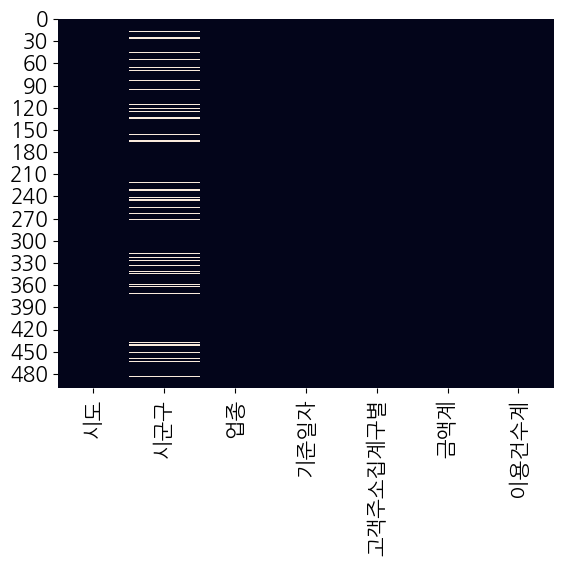

In [ ]:
# seaborn 활용한 결측치 확인
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
df = df_og.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가맹점주소광역시도  500 non-null    object 
 1   가맹점주소시군구   442 non-null    object 
 2   업종대분류      500 non-null    object 
 3   기준일자       500 non-null    int64  
 4   고객주소집계구별   500 non-null    float64
 5   카드이용금액계    500 non-null    int64  
 6   카드이용건수계    500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# 숫자 -> 문자열
df['기준일자'] = df['기준일자'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가맹점주소광역시도  500 non-null    object 
 1   가맹점주소시군구   442 non-null    object 
 2   업종대분류      500 non-null    object 
 3   기준일자       500 non-null    object 
 4   고객주소집계구별   500 non-null    float64
 5   카드이용금액계    500 non-null    int64  
 6   카드이용건수계    500 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB


In [ ]:
# 기준일자를 년도-월-일 형식으로 변경
df['기준일자'] = df['기준일자'].str[:4] + '-' + df['기준일자'].str[4:6] + '-' + df['기준일자'].str[6:]
df.head(2)

,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
0,서울,강남구,전자상거래,2020-10-21,1.123080e+12,251500,25
1,서울,관악구,요식/유흥,2017-03-12,1.112050e+12,158445,20


In [ ]:
# 기준일자를 날짜형식으로 변경
df['기준일자'] = pd.to_datetime(df['기준일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   가맹점주소광역시도  500 non-null    object        
 1   가맹점주소시군구   442 non-null    object        
 2   업종대분류      500 non-null    object        
 3   기준일자       500 non-null    datetime64[ns]
 4   고객주소집계구별   500 non-null    float64       
 5   카드이용금액계    500 non-null    int64         
 6   카드이용건수계    500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 27.5+ KB


In [ ]:
# 년월일 추출
df['년도'] = df['기준일자'].dt.year
df['월'] = df['기준일자'].dt.month
df['일'] = df['기준일자'].dt.day
df['요일'] = df['기준일자'].dt.weekday
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   가맹점주소광역시도  500 non-null    object        
 1   가맹점주소시군구   442 non-null    object        
 2   업종대분류      500 non-null    object        
 3   기준일자       500 non-null    datetime64[ns]
 4   고객주소집계구별   500 non-null    float64       
 5   카드이용금액계    500 non-null    int64         
 6   카드이용건수계    500 non-null    int64         
 7   년도         500 non-null    int64         
 8   월          500 non-null    int64         
 9   일          500 non-null    int64         
 10  요일         500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 43.1+ KB


In [ ]:
# map함수를 통한 데이터 변환
dt = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

In [ ]:
# 년,월,일 -> 범주형 자료로 변환
df['요일이름'] = df['요일'].map(dt)

df = df.astype({'년도':'category', '월':'category', '일':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   가맹점주소광역시도  500 non-null    object        
 1   가맹점주소시군구   442 non-null    object        
 2   업종대분류      500 non-null    object        
 3   기준일자       500 non-null    datetime64[ns]
 4   고객주소집계구별   500 non-null    float64       
 5   카드이용금액계    500 non-null    int64         
 6   카드이용건수계    500 non-null    int64         
 7   년도         500 non-null    category      
 8   월          500 non-null    category      
 9   일          500 non-null    category      
 10  요일         500 non-null    int64         
 11  요일이름       500 non-null    object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 38.6+ KB


In [ ]:
# 범주형 자료 그래프 점수, 매개변수 작성 : 함수 define(정의)
def cplot(df,col):
    if col != '요일이름' : sns.barplot(x=col, y='카드이용금액계', data= df)
    else: sns.barplot(x=col, y='카드이용금액계', order = ['월','화','수','목','금','토','일'], data= df)    # 요일은 요일이름 표시하기

    if col =='업종대분류' : plt.xticks(rotation=90) # 업종대분류 열의 항목은 기니까 수직으로 표현
    plt.xlabel('')
    plt.title(col)
    plt.show()

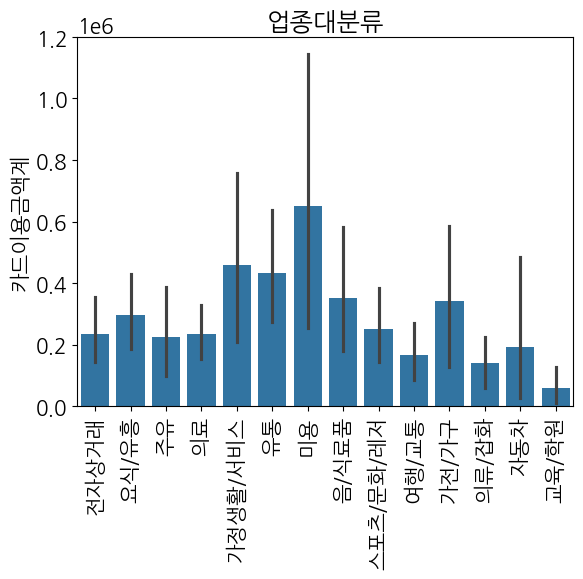

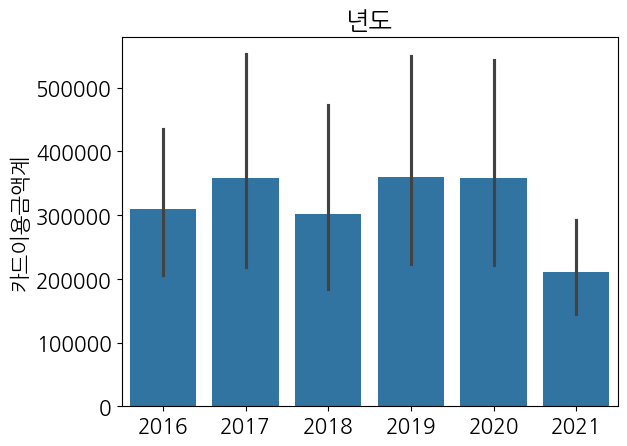

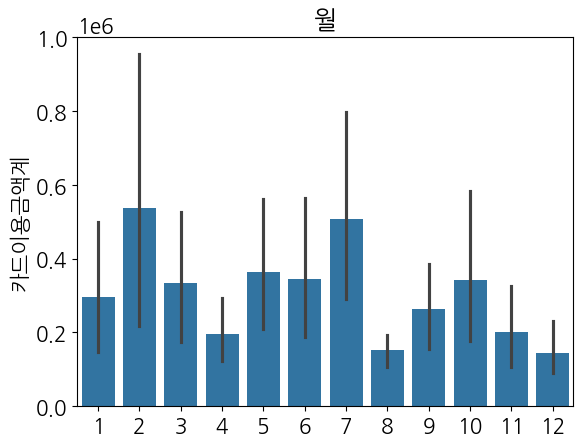

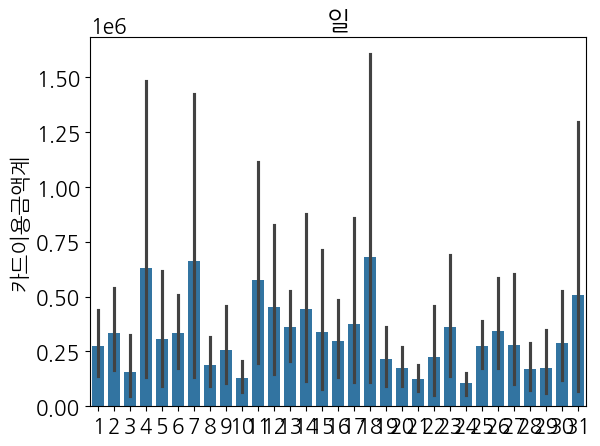

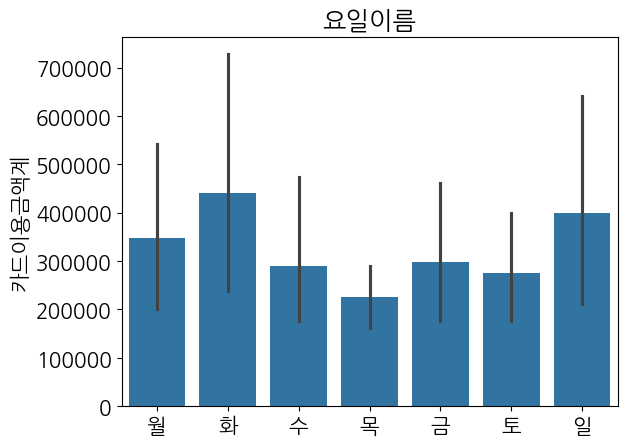

In [ ]:
lt = ['업종대분류', '년도', '월', '일', '요일이름']
for c in lt:
    cplot(df,c)